In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

# Homework 6


This notebook contains Python problems you need to complete. Write your codes directly here.  Save your code and upload this file to [Gradescope](https://www.gradescope.com).  You do not have to export your solution to a zip file (Don't need to run the last cell.).  Simply upload "hw6.ipynb".

You also need the data files "LoanDataOriginal.csv" and "covid_all.csv".  So, make sure they are in the *same* folder where this file is.

In this assignment, you may see some tests are hidden.  So, you may not get the full credit points if your code is not fully implemented as specified. 

In [2]:
# This will tell you what your working directory is
%pwd

'C:\\Users\\chris\\Desktop\\student-hw6\\student'

In [3]:
# If you do not see LoanDataOriginal.csv and covid_all.csv, you need to use %cd '***The correct directory path***'
%ls

 Volume in drive C is Windows
 Volume Serial Number is F8FD-8A6F

 Directory of C:\Users\chris\Desktop\student-hw6\student

05/03/2021  06:49 PM    <DIR>          .
05/03/2021  06:49 PM    <DIR>          ..
05/02/2021  10:56 PM    <DIR>          .ipynb_checkpoints
05/03/2021  06:50 PM           153,205 .OTTER_LOG
05/02/2021  10:55 PM         4,324,257 covid_all.csv
05/03/2021  06:49 PM           387,311 hw6.ipynb
05/02/2021  10:55 PM        14,556,261 LoanDataOriginal.csv
05/02/2021  10:55 PM    <DIR>          tests
               4 File(s)     19,421,034 bytes
               4 Dir(s)  865,382,993,920 bytes free


### Data Manipulation with Pandas

In [4]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [5]:
# Import the file as DataFrame object and assign it to loans. 
# The index column will be generated automatrically.
loans=pd.read_csv("LoanDataOriginal.csv")
loans.head()

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,Income,MonthlyDebt,YearsCreditHistory,OpenAccounts,CreditProblems,CurrentCredit,MaximumCredit
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,5214.74,17.2,6,1,228190,416746.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,33295.98,21.1,35,0,229976,850784.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,29200.53,14.9,18,1,297996,750090.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,8741.90,12.0,9,0,256329,386958.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,20639.70,6.1,15,0,253460,427174.0


In [6]:
# Check the structure of loans DataFrame object.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   LoanID              100000 non-null  object 
 1   CustomerID          100000 non-null  object 
 2   LoanStatus          100000 non-null  object 
 3   CurrentLoanAmount   100000 non-null  int64  
 4   Term                100000 non-null  object 
 5   CreditScore         80846 non-null   float64
 6   Income              80846 non-null   float64
 7   MonthlyDebt         100000 non-null  float64
 8   YearsCreditHistory  100000 non-null  float64
 9   OpenAccounts        100000 non-null  int64  
 10  CreditProblems      100000 non-null  int64  
 11  CurrentCredit       100000 non-null  int64  
 12  MaximumCredit       99998 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 9.9+ MB


In [7]:
# Descriptive statistics of loans
loans.describe()

,CurrentLoanAmount,CreditScore,Income,MonthlyDebt,YearsCreditHistory,OpenAccounts,CreditProblems,CurrentCredit,MaximumCredit
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607984e+05
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384503e+06
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09


**Question 1 (1pt):** After reading "LoanDataOriginal.csv" as a pandas.core.frame.DataFrame object named loan (already coded above), change the data type of `LoanStatus` as `category`. Refer to the pandas documentation for the [category](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) data type and check out the examples. 

<!--
BEGIN QUESTION
name: q1
points:
    - 1    
-->

In [8]:
loans['LoanStatus'] = loans['LoanStatus'].astype("category")

# See if LoanStatus has the correct dtype
print(loans['LoanStatus'].dtype)
loans['LoanStatus'].dtype

category


CategoricalDtype(categories=['Charged Off', 'Fully Paid'], ordered=False)

In [9]:
grader.check("q1")

q1 passed!

**Question 2 (4pts):** 
- Replace all values of `99999999` in `CurrentLoanAmount` with `NaN`.  That is, assign `np.NaN` to all items in column `CurrentLoanAmount` that satisfies the condition `loans['CurrentLoanAmount']==99999999`. 
- Rename the column name of `CurrentLoanAmount` to `LoanAmount` and that of `CurrentCredit` to `Credit`.
- Take the average of `LoanAmount` and store it in a variable named `avg_loan`.  The `np.mean()` function or Series object's `mean()` method will ignore the NaNs.
- Replace all NaNs in `LoanAmount` with `avg_loan`. 

<!--
BEGIN QUESTION
name: q2
points:
    each: 1
-->

In [10]:
print("before:\n",loans.head(3))
print("columns:\n", loans.columns, "__________________________________\n")
loans.loc[loans['CurrentLoanAmount'] == 99999999,'CurrentLoanAmount'] = np.NAN
#loans = loans[loans.CurrentLoanAmount == 99999999] = np.NAN

loans.rename(columns={'CurrentLoanAmount': 'LoanAmount', 'CurrentCredit': 'Credit'}, inplace = True) 
#loans.rename(columns={3: "LoanAmount", 11: "Credit"}) #ask why won't this work

print("after\n", loans.head(3))
print("columns:\n", loans.columns, "__________________________________\n")
#avg_loan = np.mean(loans['LoanAmount'])
avg_loan  = loans['LoanAmount'].mean()
loans.loc[loans['LoanAmount'].isna(),'LoanAmount'] = avg_loan

before:
                                  LoanID                            CustomerID  \
0  14dd8831-6af5-400b-83ec-68e61888a048  981165ec-3274-42f5-a3b4-d104041a9ca9   
1  4771cc26-131a-45db-b5aa-537ea4ba5342  2de017a3-2e01-49cb-a581-08169e83be29   
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  5efb2b2b-bf11-4dfd-a572-3761a2694725   

   LoanStatus  CurrentLoanAmount        Term  CreditScore     Income  \
0  Fully Paid             445412  Short Term        709.0  1167493.0   
1  Fully Paid             262328  Short Term          NaN        NaN   
2  Fully Paid           99999999  Short Term        741.0  2231892.0   

   MonthlyDebt  YearsCreditHistory  OpenAccounts  CreditProblems  \
0      5214.74                17.2             6               1   
1     33295.98                21.1            35               0   
2     29200.53                14.9            18               1   

   CurrentCredit  MaximumCredit  
0         228190       416746.0  
1         229976       850784.0  
2 

In [11]:
grader.check("q2")

q2 passed!

**Question 3 (2pts):** 

- Add a new column `Amt_per_Acct` to the DataFrame object `loans`. `Amt_per_Acct` should be computed as `LoanAmount / OpenAccounts`.  
- Create a DataFrame (subset) that contains the loans that are fully paid and assign it to a variable named `fully_paid`. Include all columns.
- (Optional for 1pt extra credit) Create a data frame named open_le_10 by taking the first 4 columns and the last 4 columns for loans of customers with 10 or less OpenAccounts.



<!--
BEGIN QUESTION
name: q3
points:
    - 0.5
    - 0.5
    - 0.5
    - 0.5
    - 0.5
    - 0.5
-->

In [12]:
#won't work till we get # 2 to work
loans['Amt_per_Acct'] = loans['LoanAmount'] / loans['OpenAccounts'] 

fully_paid = loans.loc[loans['LoanStatus'] == "Fully Paid", :]


#********************************************extra credit option here************************************#
# Check if the new column has been added.
#loans.head(3)
fully_paid.head(3)

,LoanID,CustomerID,LoanStatus,LoanAmount,Term,CreditScore,Income,MonthlyDebt,YearsCreditHistory,OpenAccounts,CreditProblems,Credit,MaximumCredit,Amt_per_Acct
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.000000,Short Term,709.0,1167493.0,5214.74,17.2,6,1,228190,416746.0,74235.333333
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.000000,Short Term,NaN,NaN,33295.98,21.1,35,0,229976,850784.0,7495.085714
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,312313.597881,Short Term,741.0,2231892.0,29200.53,14.9,18,1,297996,750090.0,17350.755438


In [13]:
grader.check("q3")

q3 passed!

**Question 4 (2pts):** 

From the `loans` DataFrame object: 
- Create a DataFrame object named `low_risk` which has selected columns `[CustomerID, LoanAmount`, `Credit`, `Income`,`CreditScore]` and includes loans of customers with `YearsCreditHistory` greater than average and `MonthlyDebt` less than average.  Remember that you need to use bitwise logical operators (`&`,`|`, `~`) instead of regular logical operators (`and`, `or`, `not) when comparing the elements of an array-like structure.
- Create a data frame named valued_customer with selected columns - `LoanID, LoanStatus, OpenAccounts, Amt_per_Acct, MonthlyDebt` - for fully paid loans where Amt_per_Acct is \$100,000 or more.

<!--
BEGIN QUESTION
name: q4
points: 
    - 0.5
    - 0.5
    - 0.5
    - 0.5
-->

In [14]:
# need to get #2 right
is_low_risk = (loans['YearsCreditHistory'] > np.mean(loans['YearsCreditHistory'])) & (loans['MonthlyDebt'] < np.mean(loans['MonthlyDebt']))
low_risk = loans.loc[is_low_risk, ['CustomerID', 'LoanAmount', 'Credit', 'Income','CreditScore']] 

valued_customer = fully_paid.loc[ fully_paid['Amt_per_Acct'] >= 100000, ['LoanID', 'LoanStatus', 'OpenAccounts', 'Amt_per_Acct', 'MonthlyDebt']]
# Display and check if your answer works.
#print(low_risk.head(3))
#valued_customer.head(3)

In [15]:
grader.check("q4")

q4 passed!

**Question 5 (3pt):** 

- Import "covid_all.csv" as a pandas.core.frame.DataFrame object named `covid_all`. Use the first column as the index column. 

- Remove all rows that are not the data for the 50 states and DC and store them in a new variable named `covid_main`. Hint: Use columns `state` and `Type` to include only the states and DC (i.e., `covid_all['state']=='DC' | covid_all['Type']=='State'`). You just need to use `loc` to apply this filter and select all columns (using :).

- Select the columns, `date`, `state`, `Name`, `Population`, `deathIncrease`, `hospitalizedCurrently`, `positiveIncrease`, and `totalTestResultsIncrease` from `covid_main`. Then, rename these columns with new names `Date`, `StateCode`, `StateName`, `Pop`, `NewDeath`, `HospNow`, `NewCase`, and `NewTest`. Finally, assign this to a new variable named `covid`.

- Convert the `Date` column to datetime. The code for this is provided for you below.

<!--
BEGIN QUESTION
name: q5
points: 
    - 1
    - 1
    - 1
-->

In [16]:
covid_all = pd.read_csv("covid_all.csv", index_col = 0)

covid_main = covid_all.loc[(covid_all['state']=='DC') | (covid_all['Type']=='State'), :]
#covid_all.info()
print(covid_all.head())

covid = covid_main.loc[:,['date', 'state', 'Name', 'Population', 'deathIncrease', 'hospitalizedCurrently', 'positiveIncrease', 'totalTestResultsIncrease']]


covid.rename(columns={'date': 'Date', 'state': 'StateCode', 'Name': 'StateName', 'Population':'Pop', 'deathIncrease':'NewDeath', 'hospitalizedCurrently':'HospNow', 'positiveIncrease':'NewCase', 'totalTestResultsIncrease':'NewTest'}, inplace = True)


# Insert code that sets index with 'Date' column as a datetime object.
covid['Date'] = pd.to_datetime(covid['Date'], format="%Y-%m-%d")

#covid.info()
#covid


         date state    death  deathConfirmed  deathIncrease  deathProbable  \
1  2021-03-07    AK    305.0             NaN              0            NaN   
2  2021-03-07    AL  10148.0          7963.0             -1         2185.0   
3  2021-03-07    AR   5319.0          4308.0             22         1011.0   
4  2021-03-07    AS      0.0             NaN              0            NaN   
5  2021-03-07    AZ  16328.0         14403.0              5         1925.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
1        1293.0                  1293.0                   33.0   
2       45976.0                 45976.0                  494.0   
3       14926.0                 14926.0                  335.0   
4           NaN                     NaN                    NaN   
5       57907.0                 57907.0                  963.0   

   hospitalizedIncrease  ...  totalTestsPeopleAntibody  \
1                     0  ...                       NaN   
2                 

In [17]:
grader.check("q5")

q5 passed!

**Question 6 (3pt):** 

- Count the number of NaNs or 0s in the `NewCase` column of covid and store it in a variable named `num_no_case`. Hint: The `np.sum()` function or the 'Series object's `sum()` method  can be useful to count the number of `True`’s in a logical vector. Create a logical vector that represent whether its elements are `NaN` or 0 (i.e., `covid['NewCase'].isna() | covid['NewCase']==0`).

- Count the number of all `NaN`s in covid and store it in a variable named `num_NaN`. You may have to run `sum()` twice because `sum()` performs a summation of array elements over a given axis. 

- Run `covid.info()` and `covid.tail()` and see what columns have NAs. You may also notice that `Pop` is currently not a numeric type. Change the data type of `Pop` to numeric. Hint: `s.str.replace(",","")` can remove all commas in all elements in Series `s`. You may then want to use the `astype()` function after removing the commas.

- Replace all `NaN`s in column `HospNow` with 0s. Then, try the following code to see the trend of hopitalization for North Carolina and neighboring states. 

<!--
BEGIN QUESTION
name: q6
points: 
    - 1
    - 1
    - 1
-->

In [18]:
# Write your code here ###
num_no_case = (covid['NewCase'].isna() | covid['NewCase']==0).sum()
print("part1\n", num_no_case)

part1
 1123


In [19]:
num_NaN = covid.isna().sum().sum()
print("part2\n", num_NaN)

part2
 2285


In [20]:
covid.info()
covid.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18995 entries, 1 to 20780
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       18995 non-null  datetime64[ns]
 1   StateCode  18995 non-null  object        
 2   StateName  18995 non-null  object        
 3   Pop        18995 non-null  object        
 4   NewDeath   18995 non-null  int64         
 5   HospNow    16710 non-null  float64       
 6   NewCase    18995 non-null  int64         
 7   NewTest    18995 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 1.3+ MB


,Date,StateCode,StateName,Pop,NewDeath,HospNow,NewCase,NewTest
20776,2020-01-17,WA,Washington,"7,614,893",0,NaN,0,0
20777,2020-01-16,WA,Washington,"7,614,893",0,NaN,0,0
20778,2020-01-15,WA,Washington,"7,614,893",0,NaN,0,0
20779,2020-01-14,WA,Washington,"7,614,893",0,NaN,0,0
20780,2020-01-13,WA,Washington,"7,614,893",0,NaN,0,0


In [21]:
covid['Pop']=covid['Pop'].str.replace(",","").astype(int)

In [22]:
covid.loc[covid['HospNow'].isna(),'HospNow'] = 0

In [23]:
grader.check("q6")

q6 passed!

## Data Visualization with pandas and matplotlib

StateCode
GA    AxesSubplot(0.125,0.125;0.775x0.755)
NC    AxesSubplot(0.125,0.125;0.775x0.755)
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HospNow, dtype: object

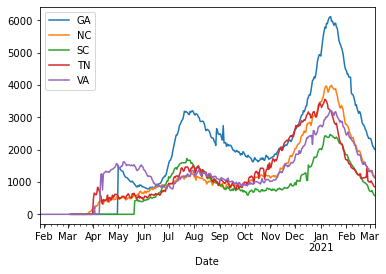

In [24]:
# The following code is to show how to visualize your data in Python
import matplotlib.pyplot as plt
plt.close("all")

covid5 = covid.loc[covid['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','HospNow']]
covid5.set_index('Date',inplace=True)
covid5.groupby('StateCode')['HospNow'].plot(legend=True)

**Question 7 (1pt):** 
    
Modify `covid` to create a new column named `HospPerKiloPop`, which is calculated as `1000*HospNow/Pop`. This measure represents the number of hospitalized patients per 1,000 people, and thus it is a good measure to compare states with different sizes. Plot `HospPerKiloPop` instead of 'HospNow' to see whether hopitalization in North Carolina was better or worse than other neighboring states.

<!--
BEGIN QUESTION
name: q7
points: 
    - 0.5
    - 0.5
-->

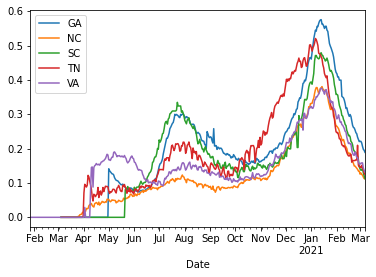

In [25]:
covid['HospPerKiloPop'] = 1000* covid['HospNow']/covid['Pop']

covid5 = covid.loc[covid['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','HospPerKiloPop']]
covid5.set_index('Date',inplace=True)
covid5.groupby('StateCode')['HospPerKiloPop'].plot(legend=True)


plt.show()
del(covid['HospPerKiloPop']) # Delete the newly added column

In [26]:
grader.check("q7")

q7 passed!

**Question 8 (3pt):** 

Below you will find a code that generates a monthly summary data named `covid_mon`.  Add your code for the following:
- Add a new column named `PosRate` to `covid_mon`, which is calculated as `MCase/MTest`.
- Add a new column named `MDeathPerMilPop`, which represents monthly number of deaths per milllion people. 
- Add a set of new columns `MHospPerKiloPop`, `MCasePerKiloPop`, and `MTestPerKiloPop`. These should represent monthly total hopitalized days, number of cases, and number of tests per 1,000 people. 

<!--
BEGIN QUESTION
name: q8
points: 
    each: 0.5
-->


In [27]:
#The following code generates a monthly summary data.
covid['Year'] = pd.DatetimeIndex(covid['Date']).year
covid['Month'] = pd.DatetimeIndex(covid['Date']).month
covid = covid.loc[((covid['Year']==2020) & (covid['Month']>=3))| ((covid['Year']==2021) & (covid['Month']<=2)),:]

covid_mon = covid.groupby(by=['Year','Month','StateCode'])[['NewDeath','HospNow','NewCase','NewTest']].sum()
covid_mon_add = covid.groupby(by=['Year','Month','StateCode'])[['Date','Pop']].max()
covid_mon = pd.concat([covid_mon, covid_mon_add],axis=1)
covid_mon = covid_mon.rename({'NewDeath':'MDeath','HospNow':'MHosp','NewCase':'MCase','NewTest':'MTest'}, axis=1)
covid_mon = covid_mon.reset_index()

In [28]:
covid_mon.head()

,Year,Month,StateCode,MDeath,MHosp,MCase,MTest,Date,Pop
0,2020,3,AK,3,0.0,128,3705,2020-03-31,731545
1,2020,3,AL,13,1003.0,981,7279,2020-03-31,4903185
2,2020,3,AR,8,376.0,523,6476,2020-03-31,3017804
3,2020,3,AZ,24,0.0,1287,27966,2020-03-31,7278717
4,2020,3,CA,153,5863.0,7429,28739,2020-03-31,39512223


In [29]:
# Write your code here ###
covid_mon['PosRate'] = covid_mon['MCase']/ covid_mon['MTest'] 

covid_mon['MDeathPerMilPop'] = 1000000*covid_mon['MDeath']/covid_mon['Pop'] #monthly number of deaths per milllion people

In [30]:
covid_mon['MHospPerKiloPop']  = 1000*covid_mon['MHosp']/covid_mon['Pop']  #monthly total hopitalized days per 1,000 people
covid_mon['MCasePerKiloPop']  = 1000*covid_mon['MCase']/covid_mon['Pop']  #number of cases per 1,000 people
covid_mon['MTestPerKiloPop']  = 1000*covid_mon['MTest']/covid_mon['Pop']  # number of tests per 1,000 people

In [31]:
grader.check("q8")

q8 passed!

### The codes below will let you visualize each COVID-19 metric.  
Feel free to improve the visualization such as adding the title.  No points are assigned though.

StateCode
GA    AxesSubplot(0.125,0.125;0.775x0.755)
NC    AxesSubplot(0.125,0.125;0.775x0.755)
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: PosRate, dtype: object

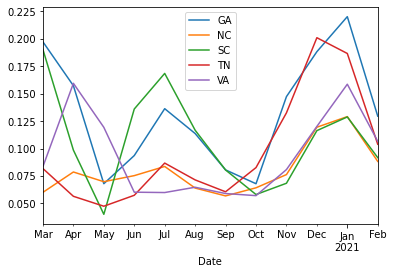

In [32]:
pos_rate = covid_mon.loc[covid_mon['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','PosRate']]
pos_rate.set_index('Date').groupby('StateCode')['PosRate'].plot(legend=True)

StateCode
GA    AxesSubplot(0.125,0.125;0.775x0.755)
NC    AxesSubplot(0.125,0.125;0.775x0.755)
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MDeathPerMilPop, dtype: object

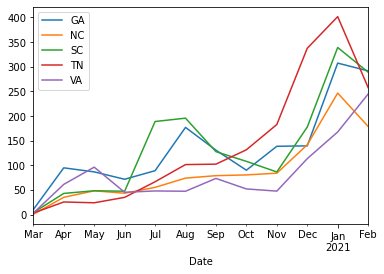

In [33]:
mdeath = covid_mon.loc[covid_mon['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','MDeathPerMilPop']]
mdeath.set_index('Date').groupby('StateCode')['MDeathPerMilPop'].plot(legend=True)

StateCode
GA    AxesSubplot(0.125,0.125;0.775x0.755)
NC    AxesSubplot(0.125,0.125;0.775x0.755)
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MHospPerKiloPop, dtype: object

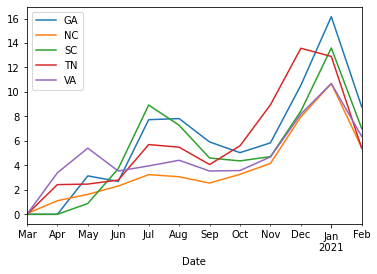

In [34]:
mhosp = covid_mon.loc[covid_mon['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','MHospPerKiloPop']]
mhosp.set_index('Date').groupby('StateCode')['MHospPerKiloPop'].plot(legend=True)

StateCode
GA    AxesSubplot(0.125,0.125;0.775x0.755)
NC    AxesSubplot(0.125,0.125;0.775x0.755)
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MCasePerKiloPop, dtype: object

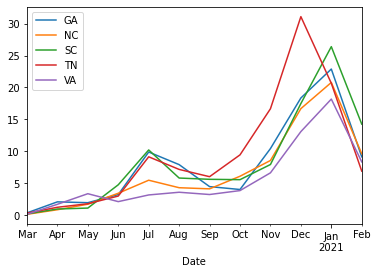

In [35]:
mcase = covid_mon.loc[covid_mon['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','MCasePerKiloPop']]
mcase.set_index('Date').groupby('StateCode')['MCasePerKiloPop'].plot(legend=True)

StateCode
GA    AxesSubplot(0.125,0.125;0.775x0.755)
NC    AxesSubplot(0.125,0.125;0.775x0.755)
SC    AxesSubplot(0.125,0.125;0.775x0.755)
TN    AxesSubplot(0.125,0.125;0.775x0.755)
VA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MTestPerKiloPop, dtype: object

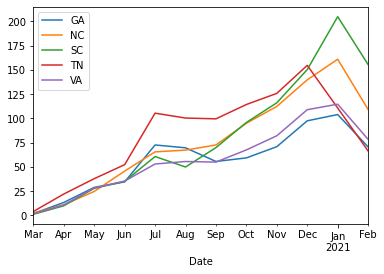

In [36]:
mtest = covid_mon.loc[covid_mon['StateCode'].isin(['NC','VA','SC','TN','GA']), ['Date','StateCode','MTestPerKiloPop']]
mtest.set_index('Date').groupby('StateCode')['MTestPerKiloPop'].plot(legend=True)

**Question 9 (2pt):** 
    
- Use `pivot_table()` so that StateCode values (e.g., ’NC’) become variables and each cell contains a `MHosp` value. You need `Date`, `StateCode`, and `MHosp` in `pivot_table()` to get the format you want. Assign the modified DataFrame to a variable named `hospital_days`.
- Modify `hospital_days` to add a new column named `USTotal` that aggregates the number of hospital days. Hint: Use the correct axis value.

<!--
BEGIN QUESTION
name: q9
points: 
    each: 0.5
-->

In [37]:
# Write your code here ###
hospital_days = covid_mon.pivot_table(values='MHosp', columns='StateCode', index = 'Date')

In [38]:
hospital_days['USTotal']=hospital_days.sum(axis=1)

In [39]:
# Check if your code works
hospital_days

StateCode,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,USTotal
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,0.0,1003.0,376.0,0.0,5863.0,2980.0,2313.0,0.0,205.0,0.0,...,9.0,196.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,97035.0
2020-04-30,386.0,10802.0,2542.0,11575.0,121601.0,26346.0,48061.0,5371.0,6298.0,0.0,...,16568.0,38829.0,0.0,28944.0,1158.0,14995.0,10386.0,1880.0,238.0,1508083.0
2020-05-31,379.0,15613.0,2542.0,24709.0,140092.0,20184.0,32074.0,10662.0,7599.0,0.0,...,16870.0,51825.0,3883.0,46156.0,580.0,14999.0,11441.0,1611.0,337.0,1371778.0
2020-06-30,422.0,19051.0,6297.0,50850.0,145279.0,8405.0,6792.0,6197.0,2982.0,0.0,...,19111.0,93101.0,6431.0,30211.0,397.0,11955.0,8612.0,811.0,188.0,923715.0
2020-07-31,952.0,40362.0,13168.0,95275.0,249725.0,10680.0,2283.0,2882.0,1758.0,191410.0,...,38915.0,304166.0,7563.0,33757.0,533.0,14866.0,8410.0,1985.0,420.0,1604940.0
2020-08-31,1281.0,39761.0,14869.0,41750.0,197668.0,8425.0,1805.0,2610.0,1286.0,180539.0,...,37477.0,199705.0,5808.0,37704.0,371.0,15109.0,10586.0,4060.0,494.0,1378711.0
2020-09-30,1257.0,23902.0,12579.0,17528.0,114540.0,7169.0,2023.0,2667.0,1808.0,79467.0,...,27773.0,103272.0,5120.0,30205.0,100.0,11595.0,12003.0,4749.0,506.0,922622.0
2020-10-31,1800.0,26504.0,17974.0,22918.0,95700.0,14659.0,6027.0,2919.0,3071.0,66572.0,...,38242.0,133736.0,8840.0,30518.0,79.0,12066.0,33205.0,5846.0,2016.0,1160606.0
2020-11-30,3838.0,37704.0,25244.0,48539.0,151325.0,42652.0,20776.0,3470.0,4448.0,96465.0,...,61089.0,219546.0,15045.0,40029.0,481.0,21327.0,58301.0,11440.0,5705.0,2150388.0


In [40]:
grader.check("q9")

q9 passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [63]:
grader.check_all()

q1 passed!

q2 passed!

q3 passed!

q4 passed!

q5 results:

Trying:
    (covid.columns.values==['Date', 'StateCode', 'StateName', 'Pop', 'NewDeath', 'HospNow','NewCase', 'NewTest']).all()
Expecting:
    True
<doctest q5 2[0]>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (covid.columns.values==['Date', 'StateCode', 'StateName', 'Pop', 'NewDeath', 'HospNow','NewCase', 'NewTest']).all()
**********************************************************************
Line 1, in q5 2
Failed example:
    (covid.columns.values==['Date', 'StateCode', 'StateName', 'Pop', 'NewDeath', 'HospNow','NewCase', 'NewTest']).all()
Exception raised:
    Traceback (most recent call last):
      File "C:\Users\chris\anaconda3\lib\doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q5 2[0]>", line 1, in <module>
        (covid.columns.values==['Date', 'StateCode', 'StateName', 'Pop', 'NewDeath', 'HospNow','NewCase', 'NewTest']).all()
    AttributeError: 'bool' object has no attribute 'all'


q6 passed!

q7 passed!

q8 passed!

q9 passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Write your codes directly on this notebook. Upload this 'hw6.ipynb' to [Gradescope](https://www.gradescope.com)

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()